In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import re
from haversine import haversine, Unit
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

In [99]:
dfTrain = pd.read_csv("prepared_data/apartments_and_building_train.csv")
dfTest = pd.read_csv("prepared_data/apartments_and_building_test.csv")

In [100]:
def get_distance_center(lat1, lon1):
    dist = haversine((lat1, lon1), (55.751244, 37.618423), unit=Unit.METERS)
    return round(dist/1000, 3)

def get_distance_metro(lat, lon, coordinates):
    shortest = np.inf
    for metro_coordinate in coordinates:
        dist = haversine(metro_coordinate, (lat, lon), unit=Unit.METERS)
        if dist < shortest:
            shortest = dist
    if shortest == np.inf:
        return 100
    return round(shortest/1000, 3)

In [101]:
dfTrain["distance_center"] = dfTrain.loc[:, "latitude":"longitude"].apply(lambda x: get_distance_center(x.latitude, x.longitude), axis=1)
dfTest["distance_center"] = dfTest.loc[:, "latitude":"longitude"].apply(lambda x: get_distance_center(x.latitude, x.longitude), axis=1)

In [102]:
# get chrome driver
driver = webdriver.Chrome(ChromeDriverManager().install())
# url for page to analyze
driver.get('https://en.wikipedia.org/wiki/List_of_Moscow_Metro_stations')
# content of the page
content = driver.page_source

# find all spans with coordinates
soup = BeautifulSoup(content, features="html.parser")
spans = soup.find_all('span', class_="geo-dec")
driver.quit()

coordinates = []
numbers = re.compile(r'\d+(?:\.\d+)?')
# iterate all spans with coordinates
for span in spans:
    coord = span.get_text()
    coord = numbers.findall(coord)
    coord = [float(x) for x in coord]
    coordinates.append(tuple(coord))

dfTrain["distance_metro"] = dfTrain.loc[:, "latitude":"longitude"].apply(lambda x: get_distance_metro(x.latitude, x.longitude, coordinates), axis=1)
dfTest["distance_metro"] = dfTest.loc[:, "latitude":"longitude"].apply(lambda x: get_distance_metro(x.latitude, x.longitude, coordinates), axis=1)



====== WebDriver manager ======
Current google-chrome version is 95.0.4638
Get LATEST chromedriver version for 95.0.4638 google-chrome
Driver [C:\Users\levit\.wdm\drivers\chromedriver\win32\95.0.4638.69\chromedriver.exe] found in cache


In [107]:
#Address handeling
for value in dfTrain['address'].values:
    print(value)

к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
к2.5/2
14к3
14к3
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
1к3
1к3
1к3
1к3
1к3
1к3
1к3
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
5к1
3
3
8
8
8
8
8
8
8
7
7
20
20
14к1
14к1
14к1
14к1
14к1
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
98к1
98к1
98к1
98к1
26к3
26к3
26к3


2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
2к4
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
30К3
79В
79В
79В
79В
79В
79В
79В
79В
79В
79В
79В
79В
79В
79В
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2
34к2

29к1
29к1
29к1
29к1
29к1
29к1
29к1
29к1
29к1
29к1
29к1
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
37К6
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
9к6
9к6
9к6
9к6
9к6
9к6
9к6
9к6
9к6
9к6
9к6
9к6
9к6
9к6
9к6
48К1
48К1
10
14к1
14к1
14к1
2
2
2
2
2
2
2
2
2
2
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1
71к1

11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
11к6
27к3
27к3
27к3
27к3
27к3
27к3
27к3
27к3
27к3
27к3
к14
к14
к14
к14
к14
к14
к14
к14
к14
к14
к14
к14
к14
к14
к14
к14
10
33К3
16к3
16к3
16к3
16к3
19Б
19Б
19Б
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
15к1
17К2
6к2
6к2
6к2
6к2
6к2
6к2
6к2
6к2
4
24к2
14А
13
23К2
23К2
28
28
28
15
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
6к7
27
5
5
9
9
12
8К1
8К1
7
7
5
7
7
7
7
7
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
2Ак6
9С5
1к4
32
11
11
11
16
14
15
7К1
12
96
96
96
2К1
21К3
21К3
20
5к1
5к1
5к1
5к1
5к1
5к1
5к1
14
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
7с1
26
26
2Ак2
2Ак2
2Ак2
2Ак2
2Ак2
2Ак2
2Ак2
2Ак2
2Ак2
2Ак2
21К2

к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
к6.1
15К1
к8
к8
к8
к8
к8
к8
к8
к8
106К1
106К1
3К2
15К3
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
13
10
10
10
32
32
32
32
32
32
32
32
32
32
34
34
34
38
38
5К2
12
12
12
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
к7.4
7К1
4
3К1
6
5/2
37
17к2
6К2
6К2
13
13
13
13
13
13
13
13
13
13
13
13
25
6к2
2Ак4
2Ак4
2Ак4
2Ак4
2Ак4
14
61к2
8К4
13
1С1
6
6
5К3
1К2
19
14
17
134
134
134
9
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
8с1
14С1
14С1
14С1
14С1
14С1
14С1
14С1
14С1
14С1
28К1
34К1
10с1к4/5
10с1к4/5
10с

44/28
44/28
44/28
5К3
8
8К2
41К1
18К3
3К7
3К7
3К7
3К7
27
3
12
12
28С2
28С2
28С2
28С2
28С2
28С2
28С2
28С2
28С2
28С2
28С2
28С2
28С2
28С2
1К3
1К3
39К4
26К1
26К1
8К2
8К2
8К2
8К2
8К2
8К2
8К2
1
1
1
1
1
1
20
20
35
27К5
29К1
2/1
2/1
2/1
6К4
6К4
11К8
10К1
36
23
23
6К1
16
16
16
4К2
4К2
4К2
25
25
11К6
11К6
11К6
11К6
11К6
11К6
46/35К4
46/35К4
46/35К4
46/35К4
46/35К4
46/35К4
46/35К3
25
5К2
5К2
5К2
56
39
39
39
7К1
7К1
9К2
9К2
9К2
1К1
1К1
38К2
7
7
8к2
8к2
8к2
14
14
14
27К1
27К1
27К1
18К1
18К1
18К1
14/9
14/9
14/9
14/9
40/17
40/17
40/17
40/17
40/17
31К2
6
41
41
41
41
18к4
18к4
16К2
12К3
12К3
53
53
53
53
13К2
7К1
7К1
14К1
10К2
10К2
13
13
13
41
41
41
7АК2
7АК2
1К2
18К2
1К2
1К2
28
12К1
26К2
26К2
26К2
26К2
1К4
35К2
14
14
14
14
20К3
18К1
18К1
18К1
18К1
5К6
6К3
6К3
14К1
1
1
17К7
19К3
19К3
3А
3А
54
10
10
24
24
12/21
12/21
35
35
35
35
35
35
7/17
7/17
7/17
7/17
7/17
7/17
7/17
7/17
9К3
6К1
6К1
42
42
36
36
36
36
36
36
20К2
20К2
5К2
5К2
19К1
26К2
26К2
26К2
26К2
26К2
13
9К4
9К4
13
22К2
10К1
10К1
10
10
12к2
8
18А
24

15К2
15К2
64
64
64
64
125К2
125К2
15
15
29К4
40К3
40К3
40К3
54К1
22к2
128К1
128К1
33
33
50К2
28К8
28К8
35К1
35К1
35К1
110К4
33
33
18
70К2
70К2
137
11к1
11к1
11к1
11к1
11К2
11К2
11К2
7К1
7К1
31
1
35
35
35
35
35
35
35
35
11
19К1
49
49
49
49
49
49
49
39
39
39
39
46К2
46К2
53К4
53К4
27К5
45К1
45К1
45К1
45К1
45К1
45К1
25К4
44К4
44К4
44К4
44К4
44К4
44К4
44К4
44К4
44К4
15
15
31К1
12К1
24К5
24К5
24К5
7
7
7
7
16
31
31
41
26К2
70
37К1
37К1
37К1
37К1
11
11
30к2
30к2
30к2
11К2
11К2
1
1
1
21К3
18
18
18
19К2
19К2
19К2
19К2
19К2
131
24К10
24К10
130К3
130К3
130К3
7К2
7К2
136К3
136К3
19к1
14к1
15К4
15
34К5
34К5
34К5
4К4
4К4
9
9
13К3
13К3
5
6К2
6К2
6К2
58
58
58
49
12
15К5
15К5
15К5
1К4
1К4
1К4
1К4
1К4
1К4
23С928
23С928
23С928
23С928
23С928
23С928
23С928
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
38К1
38К1
27К2
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
вл13
21к2
21к2
21к2
21к2
2

3к3
3к3
3к3
13К2
13К2
25
52
52
52
52
20
20
20
20
20
13
1
1
к7
6к1
60
60
60
60
19К2
18К2
18К2
18К2
5
8
8
8
7К2
18
18
18
18
47К3
18
18
32К2
32К2
32К2
5К4
1
1
1
4
4
4
13
13
13
191
55
55
55
55
55
43
23
14
56
56
33
33
33
33
33
16К1
16К1
30
30
30
30
30
30
30
30
30
30
39К1
10К2
10К2
23
23
23
49
5К1
5К1
5К1
19к1
39К2
39К2
5
5
5
1
1
1
1
52К2
52К2
52К2
52К2
35
35
35
35
14К1
51К1
51К1
8
8
14К1
25К1
14
14
14
8/2
23К2
23К2
24
12С4
2
15
11Ж
95к2
13
13
3
3
3
3
3
3
3
3
3
24к3
24к3
24к3
4
13
13
13
2
2
52к2
52к2
52к2
52к2
52к2
9
9
8к3
№ 46 кв-л
к18/2
11И
11И
122к2
13
13
13
13
13
13
13
13
13
13
13
13
14к3
14к3
14к3
21
21
128
128
128
128
8к2
8к2
8к2
25А
25А
к14/1
к14/1
11
1к1
1к1
3
3
3
3
3
3
3
3
3
3
14к3
14к3
16к1
16к1
16к1
96к2
96к2
96к2
14к4
14к4
14к4
10
10
10
8
к3
к2
к2
к2
16
16
16
16
12
12
к15
4А
123К1
123К1
123К1
123К1
2
3
23
23
23
23
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
4к1
88к2
88к2
88к2
88к2
88к2
5
5
15
5
2
2
2
29
8
8
6к1
28
4
4
9
9
6
6
6
6
6
6
вл3с1
15к1
4к1
4к1
4к1
42


5К1
50
50
50
14К3
14К3
14К3
74/22
114К3
4К5
4К5
4К5
22
140К2
43
43
43
15К2
15К2
15К2
74
115К2
7/5К3
7/5К3
91
25
25
25
8Ак1
24К7
24К7
15К4
15К4
к616
32
8К3
8К3
16К2
16К2
7/1к1
7/1к1
22К2
22К2
9А
9А
20К2
20К3
46Б
16
16
1
40К4
6К1
6К4
56/55
24
5к2
2К3
28
2
2
9
9
9
8К2
12К2
12К2
10
11
16К3
14А
6
44
9
9
9
1
5
3
10К3
33К2
5
5
5
10
10
1К1
10К1
2К1
17А
17А
10К1
51
16
31К2
4К4
2
2
2К2
2К2
35
16К1
16К1
5
21к1
46
97
97
5К3
13
2
2
к1402
к1402
к1402
к2028
11
3
3
7/7
7/7
7/7
128к2
37
37
11
3К2
3К2
3
7
25К1
25К1
10К3
79К1
79К1
79К1
14К1
17К8
24
18
2/26
3К2
16
6
6
10
141к10
4
9К2
40К1
40К1
6К1
6К1
30
23
23К1
16
2
13к1
52
52
10
1
2к4
2к4
2к4
7
7
57к5
57к5
11/4
30К8
170Ек2
6
6
23К1
23К1
23К1
24К3
вл7к27
вл7к27
12К1
68
68
15К4
22К3
22К3
5/10
21К2
24К1
13
82
61
9К5
к518
к351
к703
15К2
7К2
19
7
7
11К1
38
38
к247
142
142
142
142
142
7
21
27
1К5
5
5
5
5
4
4
4
5к1
5к1
5к1
9/1
9/1
14К6
23
6
6
6
6
40/2С1
31
31
16С3
2А
2А
2А
6
6
6
17К2
5К3
8
8
10
10
3
3
3
3
5К2
11Д
3к1
3к1
29К1
42К1
25К2
25К2
59
59
59
1к1с3
7К6


20
14К1
43К1
43К1
1
7К2
7К2
14К2
9К1
11
11
59
23А
13/17К5
13/17К5
8
44К1
9А
7к4
47
47
13/1
13/1
1
1
60К2
60К2
41К1
36/20
36/20
14
20
6
6
2К2
2К2
2К2
2К2
65К4
116К1
3
47
10К6
10К6
69
12
12
12
12
12
123К3
123К3
123К3
123К3
12К1
5К4
5К4
28К1
18
24к1
136К4
4
2к6
2к6
16
16
16
49
10
10
10
10
1С2
45
14
8
11
11К2
4
14к1
14к1
10
26к1
вл6
3к2
3к2
6к2
5
3к1
35
35
3к1
3к1
10
4к1
8
8
8
8
14
14
14
19
7
25
21
16
16
31
9А
10
4
4
1кБ
1кБ
6С1
31К1
12
12
20К1
28к3
28к3
28к3
12
12к1
9
4К2
17К1
14к3
5
31
30С1
25
14
126
126
5
3
30К2
6
10/2
10/2
7
42С1
16С1
16С1
5
22
31С1
23К3
3
3
33А
30К2
7К2
14
20к1
4А
11к15
11к15
11к15
8
16К1
16К1
16К1
46К2
37
7
88
3
105
2К1
11
3к2
4к7
4к7
167
4
34К1
28
2К1
34
144
2
3к1
12К2
7
25
100К4
100К4
19
34
34
42к1
38К1
38К1
63
63
84
1К2
23К2
23К1
1к1
1к1
38К1
7к1
16
12
12
57К2
6К1
12
9К1
10
28К1
35
8К1
8К1
15К5
95/13к1
2
17К2
7А
53
16к1
19
6К2
128К1
13АК1
46
11к1
16
170Ек3
55
12К1
12К2
24К1
24К1
38
38
38
3К1
35К3
35К3
35К3
8
8
8
64/2
64/2
1
4
15К5
28К1
4К2
2к3
2к3
6К2
8К2
6
к1
к1


In [108]:
def process_data(dataframe, keep_col):
    """ columns = ['building_id', 'id_x', 'id_y', 'seller', 'price', 'area_total', 'area_kitchen', 
            'area_living', 'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared', 
            'bathrooms_private', 'windows_court', 'windows_street', 'balconies', 'loggias', 
            'condition', 'phones', 'new', 'latitude', 'longitude', 'district', 'street', 'address', 
            'constructed', 'material', 'stories', 'elevator_without', 'elevator_passenger',
            'elevator_service', 'parking', 'garbage_chute', 'heating', 'distance_center', 'distance_metro'] """

    remove_columns = ['street', 'address', 'building_id', 'id_y', 'id_x', 'price', 'layout']
    
   
    for col in keep_col:
        remove_columns.remove(col)

    dataframe = dataframe.drop(remove_columns, axis=1)
    
  
    """
     fill_mean=['area_total', 'area_kitchen', 
            'area_living', 'floor', 'rooms', 'ceiling', 'bathrooms_shared', 
            'bathrooms_private', 'windows_court', 'windows_street', 'balconies', 'loggias', 'phones', 'new', 'latitude', 'longitude',
            'constructed', 'stories', 'elevator_without', 'elevator_passenger',
            'elevator_service', 'garbage_chute', 'distance_center', 'distance_metro']
    
    fill_mode=['seller', 'condition', 'district','material','heating', 'parking']

    for column in dataframe.columns.values:
        #Finding the mean of the column having NaN
        mean_value=dataframe[column].mean()
        dataframe[column].fillna(value=mean_value, inplace=True)
    
        if(column in fill_mean):
            print("Filling "+column+" with mean")
            mean_value=dataframe[column].mean()
            dataframe[column].fillna(value=mean_value, inplace=True)
            
        if(column in fill_mode):
            print("Filling "+column+" with mode")
            mode_value=dataframe[column].mode()
            dataframe[column].fillna(value=mode_value, inplace=True)
        """

    return dataframe

In [109]:

imputor=IterativeImputer(imputation_order='ascending', max_iter=1000, n_nearest_features=50, tol=1e-5)


<ipython-input-110-09c7fd43c18e>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train = X_train[(train_data["price"] < qhigh)]


0
Test RMSLE: 0.16


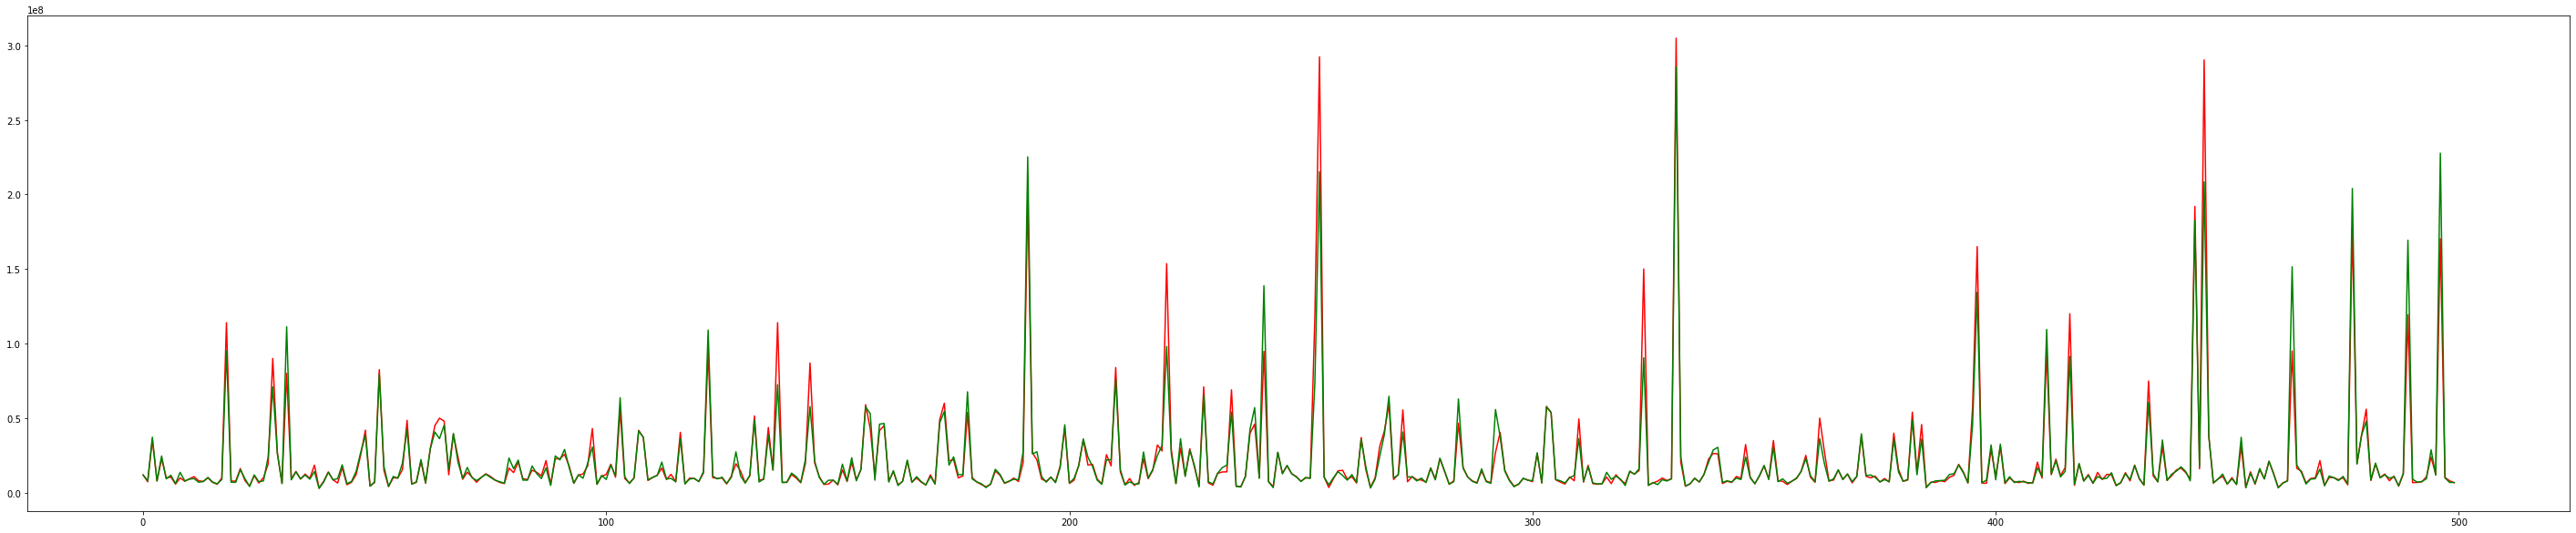

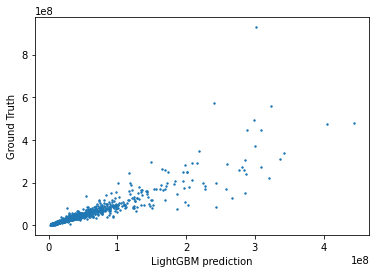

In [110]:
# normalize training data
train_data = dfTrain.copy()
train_data = process_data(train_data, keep_col=['price'])

# split training data into test and training split
X_train, X_test = train_test_split(train_data, test_size=0.15, random_state=42)

# remove apartments with very high price from training data
qhigh = X_train["price"].quantile(0.999)
X_train = X_train[(train_data["price"] < qhigh)]

# get price columns 
y_train = X_train.pop("price")
y_test = X_test.pop("price")

model5 = lgb.LGBMRegressor(
    num_leaves=100,
    max_depth=10, 
    random_state=42,
    metric='rmsle',
    n_jobs=4, 
    n_estimators=3000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

scaler = preprocessing.StandardScaler().fit(X_train)


X_train = imputor.fit_transform(X_train)
X_train = scaler.transform(X_train)

X_test = imputor.fit_transform(X_test)
X_test = scaler.transform(X_test)

model5.fit(X_train, y_train)

lgbm_prediction = model5.predict(X_test)

faulty_rows = []
for i in range(len(lgbm_prediction)):
    if lgbm_prediction[i] < 900000:
        lgbm_prediction[i] = 900000
        faulty_rows.append(X_test[i])

# list apartments resulting in too low price
print(len(faulty_rows))

lgb_rmsle = round(np.sqrt(mean_squared_log_error(lgbm_prediction, y_test)), 3)
print('Test RMSLE:', lgb_rmsle)

# red is real prices, green is predicted prices
plt.figure(figsize=(50, 10))
plt.plot(y_test.values[:500], color = 'red')
plt.plot(lgbm_prediction[:500], color = 'green')
plt.show()

# correct predictions are on the diagonal
plt.scatter(lgbm_prediction, y_test, s=2)
plt.xlabel('LightGBM prediction')
plt.ylabel('Ground Truth')
plt.show()


In [111]:
# normalize columns test data
test_data = dfTest.copy()
test_data = process_data(test_data, keep_col=['id_x', 'price'])

# separate id from test data
ids = test_data.pop("id_x")

test_data = imputor.fit_transform(test_data)
test_data = scaler.transform(test_data)


# predict
predictions = model5.predict(test_data)

# replace negative predictions and low predicitons with lowest price in dataset (not ideal)
for i in range(len(predictions)):
    if predictions[i] < 900000:
        predictions[i] = 900000

# create submission file
submission = pd.DataFrame(data=ids.values, columns=["id"])
submission["price_prediction"] = predictions
submission.to_csv("predictions.csv", index=False)